In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report


In [2]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


The data set includes information about:
1. customers who left within the last month - the column is called churn
2. Services that each customers has signed up for - phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.
3. customer account information - how long they've been a customer, contract, payment method, paperless billing, monthly charges, and total charges
4. Demographic info about customers - gender, age range, anfd if they have partners and dependents

In [4]:
data.shape

(7043, 21)

the customer churn prediction dataset has 7,043 observations/ rows with 21 attributes/columns of questions asked from each observation.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The above information helps us to know our data type, Identifies all our attributes and helps us plan ahead the attributes that're not needed in our analyis.

In [6]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

DATA   MANIPULATION

In [7]:
data = data.drop(['customerID'], axis = 1) # since customer ID is not going to be needed or relevant for  our analysis  it needs to be dropped. i.e we've no business with our anaylis
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#checking for non numeric values in TotalCharges. since we have Null/string which is identified as missing value in our total charge column They needs to removed.
invalid_rows = data[pd.to_numeric(data['TotalCharges'], errors='coerce').isna()]
print(invalid_rows)

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 N

From the above it shows we've got 11 rows that contains non numerical values in total charges and as an overall view, it also shows in another column it shows tenure is zero which interpretes that we have to delete this row.

In [10]:
data = data.dropna(subset= ['TotalCharges'])

In [11]:
print(data['TotalCharges'].dtype)


object


In [12]:

print(data['TotalCharges'].isna().sum())  # Should be 0


0


The issue i've is that it still shows me object as the data type i need it to change.let's dive deep

In [13]:
data['TotalCharges'] = data['TotalCharges'].replace(' ', pd.NA)

after replacing empty space ' " with NAN now it shows me that we actually have missing value in the column Total charge, it's just registered as space.

In [14]:
print(data['TotalCharges'].isna().sum())  # Should be 0

11


In [15]:
data = data.dropna(subset= ['TotalCharges'])

In [16]:
print(data['TotalCharges'].isna().sum())  # Should be 0

0


In [17]:
data.shape

(7032, 20)

Since we removed all the likely missing values, we're now left with a reduced observation which is 7032 and 20 attributes.

In [ ]:
#We had to convert the totalcharge attriute data type to a float/integer to stop it from being an object.
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')


In [19]:
print(data['TotalCharges'].dtype)

float64


let recheck for any missing value present in our dataset.

In [20]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

The tenure attribute typically refers to the length of time a customer has been with the company, 

In [21]:
# so i want to verify in the tenure column if we have any that's zero because if so; it shouldnt be there as we shouldn't have that there 
data[data['tenure']==0].index

Index([], dtype='int64')

In [22]:
data.drop(labels = data[data['tenure']== 0].index, axis = 0, inplace= True)

In [23]:
data[data['tenure'] == 0].index

Index([], dtype='int64')

In [24]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
data["SeniorCitizen"] = data["SeniorCitizen"].map({0: "No", 1: "Yes"}) # This is to represent this back to a categorical variable.

In [31]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [28]:
data['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64

The below code is us putting together the numerical columns together to help in the analysis.

In [29]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
data[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


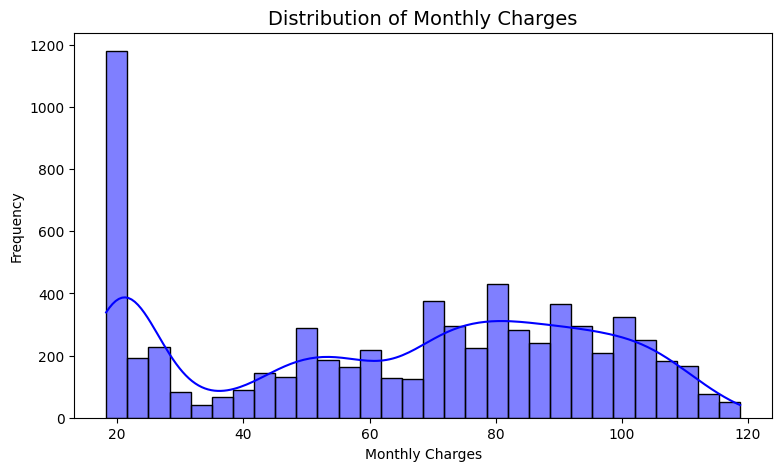

In [30]:
# Distribution of Monthly Charges (Histogram)
plt.figure(figsize=(9, 5))
sns.histplot(data['MonthlyCharges'], kde=True, bins=30, color='blue')
plt.title("Distribution of Monthly Charges", fontsize = 14)
plt.xlabel("Monthly Charges")
plt.ylabel("Frequency")
plt.show()

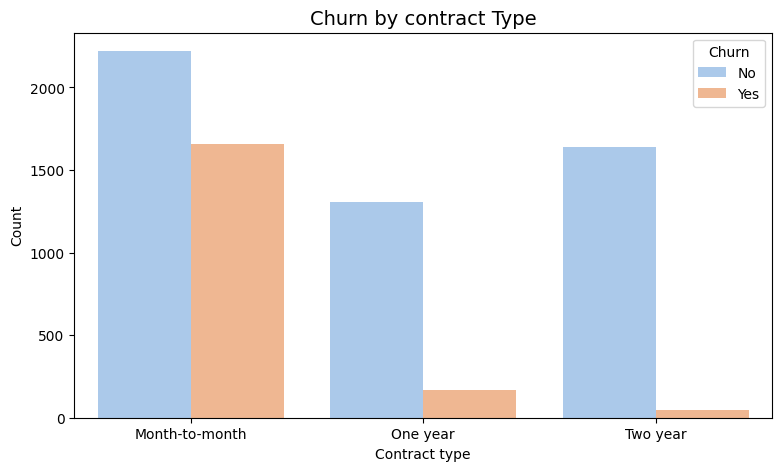

In [31]:
# churn Rate by contract type (bar plot)
plt.figure(figsize = (9, 5))
sns.countplot(data=data, x='Contract', hue='Churn', palette='pastel')
plt.title("Churn by contract Type", fontsize=14)
plt.xlabel('Contract type')
plt.ylabel("Count")
plt.show()

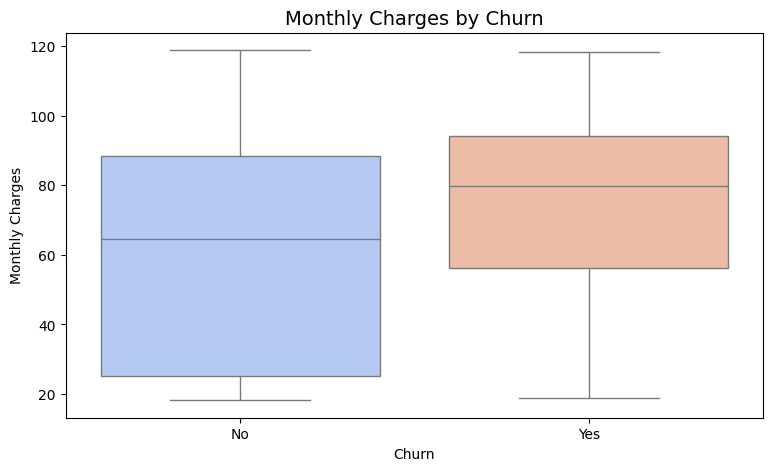

In [32]:
#Monthy Charges by Churn (Box Plot)
plt.figure(figsize=(9,5))
sns.boxplot(data=data, x='Churn', y= 'MonthlyCharges', palette='coolwarm')
plt.title("Monthly Charges by Churn", fontsize=14)
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.show()

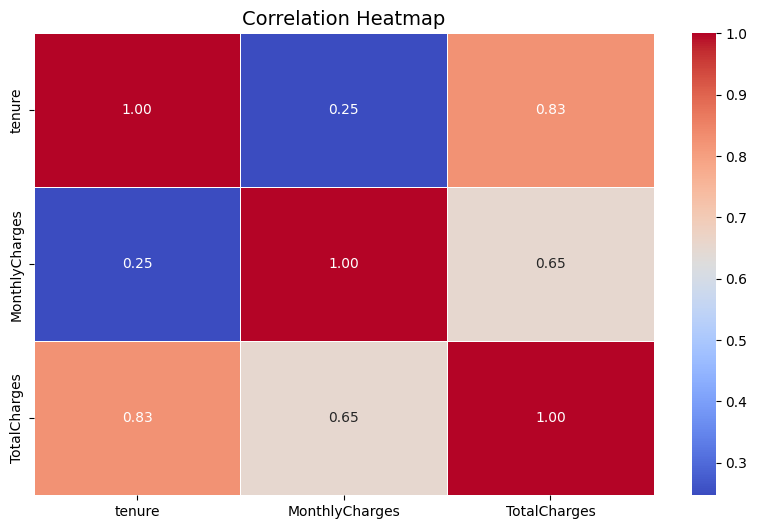

In [33]:
# Correlation heatmap
plt.figure(figsize=(10,6))
corr = data[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
sns.heatmap(corr, annot = True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

The above code shows that we've an highly correlated value between the numerical attributes present in our data. The attributes includes Total charges per tenure, monthly charges and the tenure a customer signed for.

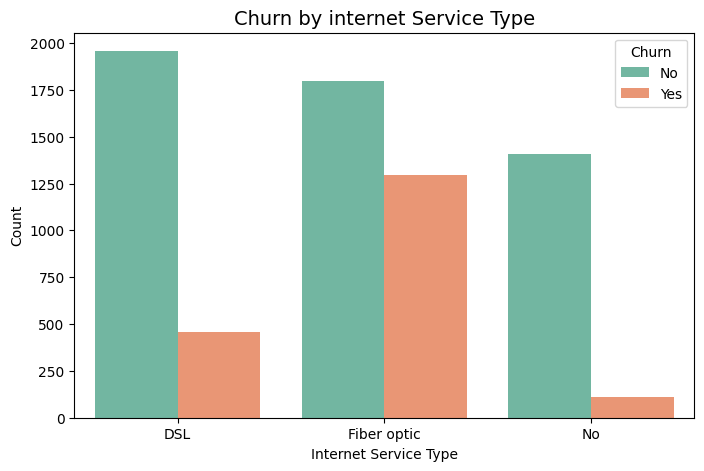

In [ ]:
# Internet Service Type vs Churn (Bar plot)
plt.figure(figsize=(9, 5))
sns.countplot(data=data, x='InternetService', hue='Churn', palette='Set2')
plt.title("Churn by internet Service Type", fontsize=14)
plt.xlabel("Internet Service Type")
plt.ylabel("Count")
plt.show()

Based on the Internet service type provided above, we could see the bar representation of the categories of internet service type provided by count of Churn; 
where the DSL: the digital subscriber Line uses telephone lines to provide internet access, it offers moderate speeds. while the fiber optic (Fiber internet ) Fiber internet
uses light signals through Fiber optic cables, offering the fastest speeds, it provides low latency, high reliability and symmetrical upload. 
NO( NO internet Service ). This indicates that no broadband internet service is available in the service area.

We could tell that the DSL category has the highest rate of retention, while the Fiber optic Internet service Type category has the highest rate of churn which you could provide insights to company to do something about more advertisemnet for the Fiber optic category.

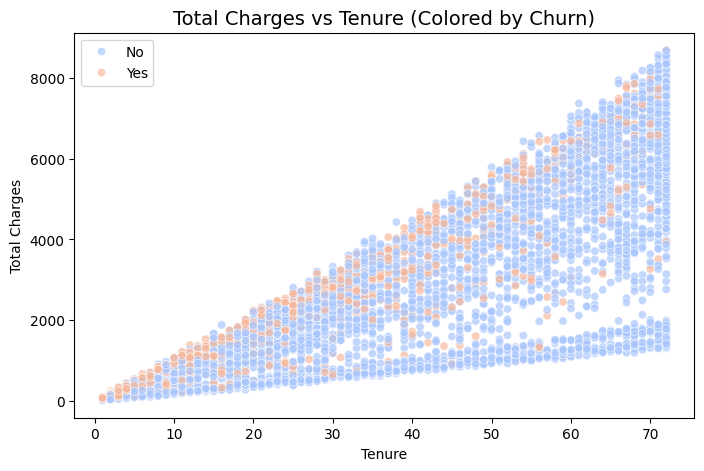

In [34]:
# Total Charges vs tenure (Colored by Churn)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='tenure', y='TotalCharges', hue='Churn', palette = 'coolwarm', alpha=0.7)
plt.title("Total Charges vs Tenure (Colored by Churn)", fontsize=14)
plt.xlabel("Tenure")
plt.ylabel("Total Charges")
plt.legend()
plt.show()

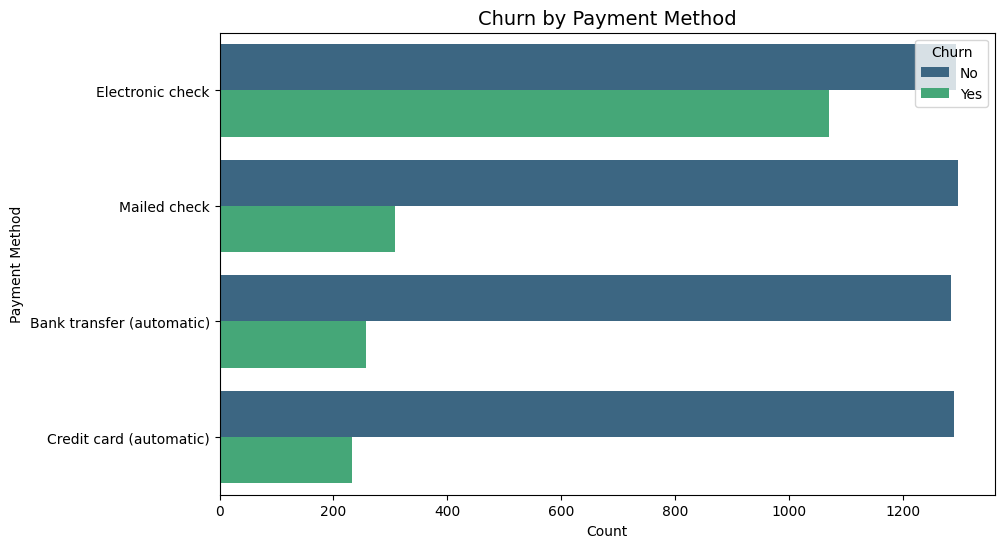

In [35]:
#Churn Rate by payment Method (Bar plot)
plt.figure(figsize=(10,6))
sns.countplot(data=data, y='PaymentMethod', hue='Churn', palette='viridis')
plt.title("Churn by Payment Method", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Payment Method")
plt.show()

From the above plot it shows that people that uses electronic check churn rate is high, maybe the customers aren't aware we've other payment method we can send an email that explaibs this.

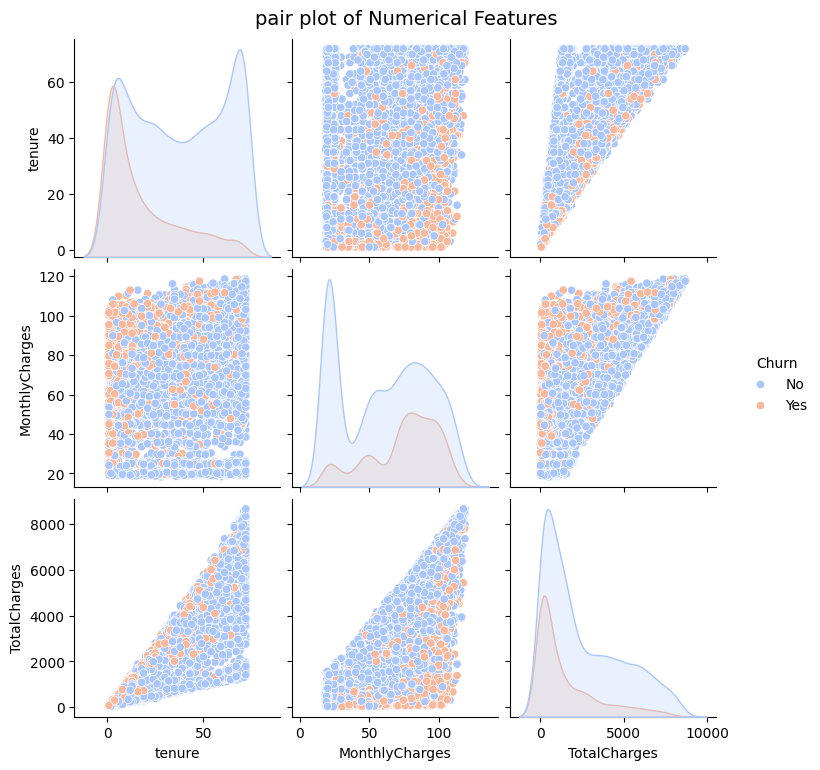

In [36]:
#Pair Plot for Numerical Features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
sns.pairplot(data, vars=numerical_features, hue='Churn', palette='coolwarm', diag_kind='kde', height=2.5)
plt.suptitle("pair plot of Numerical Features", y=1.02, fontsize=14)
plt.show()

In [ ]:
#DATA Pre-processing
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [38]:
data = data.apply(lambda x: object_to_int(x))
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [39]:
plt.figure(figsize=(14,7))
data.corr()['Churn'].sort_values(ascending = False)

Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.199484
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

<Figure size 1400x700 with 0 Axes>

From the information above you could tell that none of the variables has a correlation with the response variable which could be good to avoid issue of multi-collinearity.

Model Evaluation

In [41]:
X = data.drop(columns = ['Churn'])
y = data['Churn'].values

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state= 40, stratify=y)

In [43]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']


In [44]:
# Divide the columns into 3 categories, one for standardisation, one for label encoding and one for one hot encoding

cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] # those that need one-hot encoding
cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe)) #those that need label encoding

Standardizing data is crucial for several reason, especially in ML;  Many ML algorithms performs better when the data is standardized
Standardization ensures that each feature contributes equally to the model, preventing one attribute from dominating due to scale differences
different variables in a dataset may have different units, standardizing transforms themm into a common scale, 
It helps ML algorithms that uses gradients descent helps gradient converge faster, reducing the risk of slow training or getting stuck in local minima.

In [45]:
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

Machine Learning Model Evaluations and Predictions

LOGISTIC REGRESSION: Logistic regression is originally designed for binary classification and can be extended to multiclass problems. 
The model outputs probabilities, making it easier to understand how confident the model is in its predictions, unlike complex models like neural networks, 
logistic regression is transparent nad easy to explain. fast to train even on large datasets. works well when the number of featurees is moderate (not too high dimensional)

In [46]:
#Logistic regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
accuracy_lr = lr_model.score(X_test, y_test)
print("Logistic Regression accuracy is :", accuracy_lr)

Logistic Regression accuracy is : 0.8090047393364929


In [47]:
lr_pred = lr_model.predict(X_test)
report = classification_report(y_test, lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1549
           1       0.66      0.58      0.62       561

    accuracy                           0.81      2110
   macro avg       0.76      0.74      0.75      2110
weighted avg       0.80      0.81      0.80      2110



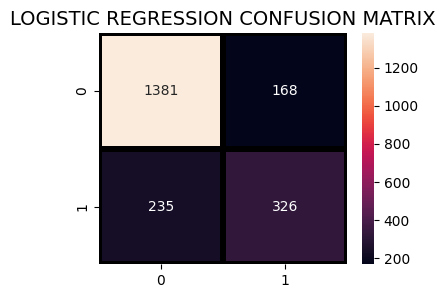

In [48]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

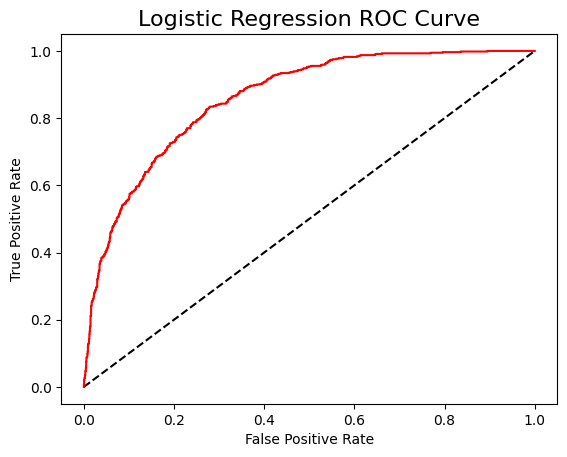

In [49]:
y_pred_prob = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

LINEAR DISCRIMINANT ANALYSIS: LDA is a supervised dimensionality reduction technique that maximizes class separability by projecting data onto a lower-dimensional space. it is commonly used for classification tasks. it assumes Gaussian distributions, features have equal covariances across classes, it finds a linear combination of features that maximizes separation.

In [58]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


In [55]:
lda = LinearDiscriminantAnalysis()
lda_model = lda.fit(X_train,y_train)
accuracy_lda= lda.score(X_test,y_test)
print(f"Linear Discriminant Analysis score: {accuracy_lda:.4f}")


Linear Discriminant Analysis score: 0.8005


In [56]:
lda_pred = lda_model.predict(X_test)
lda_report = classification_report(y_test, lda_pred)
print(lda_report)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1549
           1       0.64      0.56      0.60       561

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.79      0.80      0.80      2110



QUADRATIC DISCRIMINNAT ANALYSIS: It's a supervised classification algorithm similar to linear discriminant anlysis, but it provides more flexibility.
works well well class separtaion is not purely linear.QDA allows each class to have it's own covariances matrix, making it more flexible for datasets where class distributions have different shapes.

In [59]:
qda = QuadraticDiscriminantAnalysis()
qda_model = qda.fit(X_train,y_train)
accuracy_qda= qda.score(X_test,y_test)
print(f"Quadratic Discriminant Analysis score: {accuracy_qda:.4f}")

Quadratic Discriminant Analysis score: 0.7621


In [60]:
qda_pred = qda_model.predict(X_test)
qda_report = classification_report(y_test, qda_pred)
print(qda_report)

              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1549
           1       0.54      0.77      0.63       561

    accuracy                           0.76      2110
   macro avg       0.72      0.76      0.73      2110
weighted avg       0.80      0.76      0.77      2110



K-NEARESTNEIGHBORS: It's a non parametric, instance based learning algorithm that can be used for binary classification; 
it classifies  a new data points by looking at the Knearest neighbors in the training data. if most of the neighbors belongs to class A, the new point is assigned to class A;
it's easy to understand and implement. since knn stores the entire dataset and compute sistances at prediction time, it works best when the dataset is not too large.

In [61]:
#KNN
knn_model = KNeighborsClassifier(n_neighbors = 11)
knn_model.fit(X_train, y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test, y_test)
print("KNN accuracy:", accuracy_knn)

KNN accuracy: 0.776303317535545


In [62]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1549
           1       0.59      0.52      0.55       561

    accuracy                           0.78      2110
   macro avg       0.71      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110



Support Vector Machines(SVM): SVC works efficiently in high dimensional spaces. it's also useful in high dimensional spaces. 
It's also useful when the number of features exceeds the number of samples, svc finds a hyperplane that best separates two classes by maximizing the margin, this 
helps reduce overfitting and increases generalization to new data. if the data is not linearly separable svc can use kernel functions to transform it into a higher dimensional space where it's linearly separable.

In [63]:
#SVC


svc_model = SVC(random_state = 1)
svc_model.fit(X_train, y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test, y_test)
print("SVM accuracy is : ", accuracy_svc)

SVM accuracy is :  0.8075829383886256


In [64]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1549
           1       0.69      0.50      0.58       561

    accuracy                           0.81      2110
   macro avg       0.76      0.71      0.73      2110
weighted avg       0.80      0.81      0.80      2110



DECISION TREE: A decision tree is a based supervised learning algorithm that works well for binary classificatiom, it mimics human decision making by using if else rules, it's transparent and easy to visualize, unlike complex models like svc. trees do not assume linear relationship like logistic regression they split the feature space into rectangular decision regions, making them suitable for non linear separble data.

In [66]:
#Decision Tree Classifier

dt_model =DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test, y_test)
print("Decision Tree accuracy is : ", accuracy_dt)


Decision Tree accuracy is :  0.7241706161137441


In [67]:
print(classification_report(y_test, predictdt_y))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1549
           1       0.48      0.51      0.50       561

    accuracy                           0.72      2110
   macro avg       0.65      0.66      0.65      2110
weighted avg       0.73      0.72      0.73      2110



RANDOM FOREST: random forest is an esembling learning method that builds multiple decision trees and mmerges them to improve the overall models performance.
it's widely used for binary classification tasks, it builds multiple decision trees and makes predictions by averaging the results. this ensemble approach helps overcome the limitations of a single decision tree, particularly overfitting, by making the model more robust and accurate. DT tends to overfit, especially when thy're deep, capturing noise in the data while RF reduces overfitting by creating trees with different subsets of the data and features and combining them, thus preventing any single trees from being too biased.

In [68]:
#Random Forest


from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Random Forest Classifier
model_rf = RandomForestClassifier(
    n_estimators=500,
    oob_score=True,
    n_jobs=-1,
    random_state=50,
    max_features="sqrt",  # Use "sqrt" instead of "auto"
    max_leaf_nodes=30
)

# Fit the model
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)

# Print accuracy score
print("Accuracy:", metrics.accuracy_score(y_test, prediction_test))


Accuracy: 0.8137440758293839


In [69]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1549
           1       0.71      0.51      0.59       561

    accuracy                           0.81      2110
   macro avg       0.77      0.72      0.74      2110
weighted avg       0.80      0.81      0.80      2110



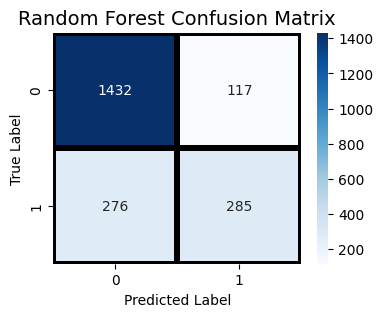

In [70]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, prediction_test)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", linecolor="k", linewidths=3, cmap="Blues")
plt.title("Random Forest Confusion Matrix", fontsize=14)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


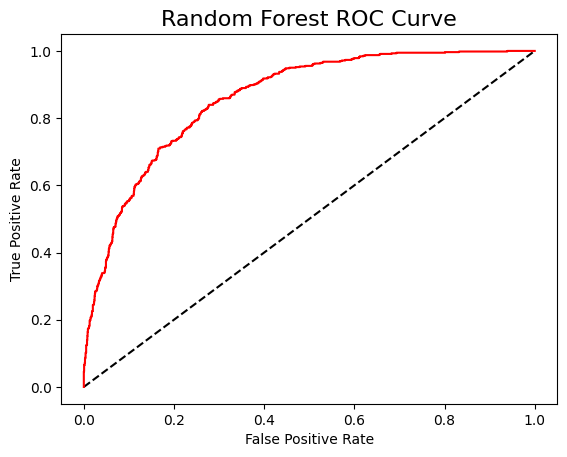

In [71]:
y_rfpred_prob = model_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

ADABOOST CLASSIFIER: Adaboost works by combining several weak learners to form a strong learner by focusing on misclassified amples from previous models, it improves the performance iteratively, leading to robust classifier, although DT overfit, adaboost tends to reduce risks through reweighting the data points and focusing on harder to classify examples.

In [72]:
#AdaBoost Classifier
a_model = AdaBoostClassifier()
a_model.fit(X_train, y_train)
a_preds = a_model.predict(X_test)
print("AdaBoost classifier accuracy")
metrics.accuracy_score(y_test, a_preds)



AdaBoost classifier accuracy


0.8075829383886256

In [73]:
print(classification_report(y_test, a_preds))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1549
           1       0.67      0.55      0.60       561

    accuracy                           0.81      2110
   macro avg       0.76      0.72      0.74      2110
weighted avg       0.80      0.81      0.80      2110



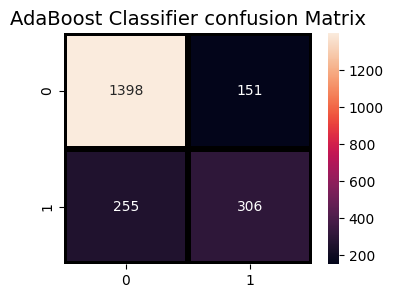

In [74]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, a_preds),annot=True,fmt="d",linecolor="k",linewidths=3)
plt.title("AdaBoost Classifier confusion Matrix", fontsize=14)
plt.show()

GRADIENTBOOSTING: it's a powerful multiclass ensemble learning method that builds models in a sequential manner, where each model corrects the errors made by the previous ones. it excels in capturing complex, non linear relationships between features and classes. this makes it well suited for multi class classification where the decision boundary between classes may ot be linear.

In [75]:
# Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))

Gradient Boosting Classifier 0.8075829383886256


In [76]:
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1549
           1       0.67      0.55      0.60       561

    accuracy                           0.81      2110
   macro avg       0.76      0.73      0.74      2110
weighted avg       0.80      0.81      0.80      2110



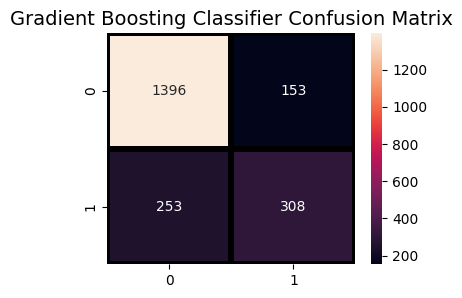

In [77]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, gb_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Gradient Boosting Classifier Confusion Matrix",fontsize=14)
plt.show()

Since we were able to identify that we may have a serious case of imbalanced dataset we introduced grid search to explore different kfold of variables and prints out the combinations that generates the best and improved accuracy using logistic regression and Linear discriminant analysis; The two less complex ML algorithms for a binary classification.

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2', 'none'],     # 'l1' requires 'liblinear' solver
    'solver': ['lbfgs', 'liblinear']
}

# Perform Grid Search
grid_search_logreg = GridSearchCV(estimator=logreg, param_grid=param_grid,
                                  cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

grid_search_logreg.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search_logreg.best_params_)

# Evaluate the model
best_logreg = grid_search_logreg.best_estimator_
y_pred_logreg = best_logreg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.0s[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.0s

[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .................C=0.01, penalty=none, solver=lbfgs; total time=   0.0s[CV] END .................C=0.01, penalty=none, solver=lbfgs; total time=   0.0s

[CV] END ...............C=0.01, penalty=l2, sol

In [80]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV

# Define the LDA model
lda = LinearDiscriminantAnalysis()

# Hyperparameter grid
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'shrinkage': [None, 'auto']  # 'shrinkage' is used only with 'lsqr' or 'eigen' solvers
}

# Perform Grid Search
grid_search_lda = GridSearchCV(estimator=lda, param_grid=param_grid,
                               cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

grid_search_lda.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search_lda.best_params_)

# Evaluate the model
best_lda = grid_search_lda.best_estimator_
y_pred_lda = best_lda.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_lda))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lda))


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ........................shrinkage=None, solver=lsqr; total time=   0.0s
[CV] END ........................shrinkage=None, solver=lsqr; total time=   0.0s
[CV] END ........................shrinkage=None, solver=lsqr; total time=   0.0s
[CV] END .........................shrinkage=None, solver=svd; total time=   0.0s
[CV] END .........................shrinkage=None, solver=svd; total time=   0.0s
[CV] END .........................shrinkage=None, solver=svd; total time=   0.0s
[CV] END .........................shrinkage=None, solver=svd; total time=   0.0s
[CV] END .........................shrinkage=None, solver=svd; total time=   0.0s
[CV] END ........................shrinkage=None, solver=lsqr; total time=   0.0s
[CV] END ........................shrinkage=None, solver=lsqr; total time=   0.0s
[CV] END .......................shrinkage=None, solver=eigen; total time=   0.0s
[CV] END .......................shrinkage=None, s

Stream lit application
The purpose is to allow manual input of a single customer's attribute using the non complex model"Logistic regression to predict churn" so this would display the prediction result as churn or not churn which ensures smooth user experience.